In [1]:
# Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to access device's os
# Showing the location of files used in this notebook.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Input data

In [2]:
# Read the CSV file as input and save it in variable df
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Show statistics of csv with various way to describe the data
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# Preprocessing data
# added a new feature called Title where the title of passenger's name is extracted.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Collecting the possibility of rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
# Replace all titles in rare_titles into Rare
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
# Mlle, Ms, Mme is renamed as Miss so that all titles that means Miss is given the same title as Miss
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [6]:
# Check null values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [7]:
# Because there was null values in Age, Cabin, Embarked, we have to fill the null values.
# For age, we fill the value with median values so that null values is not filled with random values that might ruin the dataset.
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
# Fill Embarked's value with the mode (most appeared value in Embarked)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# As for cabin, because the null values are exceeding 50% of the data, we can say that Cabin feature would be a bad fit for our dataset, 
# and we shall not fill with random values, so we drop Cabin.
df = df.drop('Cabin', axis=1)

In [11]:
# We check again the if there are any null values, turns out there are no more null values.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

# Feature Engineering

## Label Encoder untuk mengubah data kategorik menjadi numerik

In [13]:
# Feature engineering.
# Import label encoder so feature with non-numeric datatype can be transformed into numeric values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Sex, Embarked, Title is being transformed into numeric values from 0 - n, with n = amount of unique value in each feature
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Title'] = le.fit_transform(df['Title'])

In [14]:
# Calling this just to see the result of transform
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2


## Feature Selection

In [16]:
# We manually choose the feature we want to use for our model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']
# take every data in dataset, with all features
X = df[features]
# take every data in dataset, but only the label / output / target
y = df['Survived']

In [17]:
# show X
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,2
1,1,0,38.0,1,0,71.2833,0,3
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,4
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,28.0,1,2,23.4500,2,1
889,1,1,26.0,0,0,30.0000,0,2


In [18]:
# show y
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [21]:
# Splitting dataset into train dataset and test dataset
from sklearn.model_selection import train_test_split
# set variables to save X_train as feature train, X_test as feature train, y_train as label train, y_test as label test
# we split test_size, taking 20% of dataset as test
# random_state can be filled by any number, used to randomize which data is used to split, but save the result of splitting with the number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [22]:
# show feature train
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
331,1,1,45.5,0,0,28.5000,2,2
733,2,1,23.0,0,0,13.0000,2,2
382,3,1,32.0,0,0,7.9250,2,2
704,3,1,26.0,1,0,7.8542,2,2
813,3,0,6.0,4,2,31.2750,2,1
...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2,1
270,1,1,28.0,0,0,31.0000,2,2
860,3,1,41.0,2,0,14.1083,2,2
435,1,0,14.0,1,2,120.0000,2,1


In [23]:
# show label train
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data test

In [24]:
# show train test
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
709,3,1,28.0,1,1,15.2458,0,0
439,2,1,31.0,0,0,10.5000,2,2
840,3,1,20.0,0,0,7.9250,2,2
720,2,0,6.0,0,1,33.0000,2,1
39,3,0,14.0,1,0,11.2417,0,1
...,...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2,2
773,3,1,28.0,0,0,7.2250,0,2
25,3,0,38.0,1,5,31.3875,2,3
84,2,0,17.0,0,0,10.5000,2,1


In [25]:
# show label test
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Modeling

## Membangun classification model menggunakan Random Forest

In [26]:
# now we call pretrained model to process dataset, in this cell, is Random Forest.
from sklearn.ensemble import RandomForestClassifier
# call Random Forest, n_estimators = 100 (100 decision tree used), random_state is used again so that the splitting dataset state is same as previous cell
model = RandomForestClassifier(n_estimators=100, random_state=42)
# line to train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

# Evaluation

In [27]:
# take metrics from sklearn library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Prediksi data test menggunakan model random forest yang sudah dibangun

In [29]:
# with model trained, now we predict test dataset with features test.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

In [31]:
# print the actual label and predicted label
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,1
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Buat confusion matrix

In [32]:
# print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[90 15]
 [15 59]]


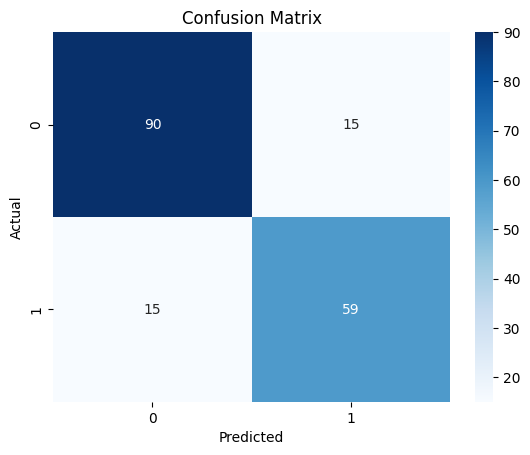

In [33]:
# print confusion matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hitung akurasi dari prediksi

In [34]:
# show accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


## Feature importances (khusus random forest)

In [35]:
# show how big is a feature's role for model
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
5,Fare,0.262494
2,Age,0.221862
1,Sex,0.207928
7,Title,0.105971
0,Pclass,0.078176
3,SibSp,0.055586
4,Parch,0.036106
6,Embarked,0.031876


In [36]:
# this cell is for KNN's model
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# call KNN model, with n_neighbors as the label comparator. (if majority's label is 1, then the result for a data is 1, and otherwise)
knn_model = KNeighborsClassifier(n_neighbors=31)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=31)

In [38]:
# predicting with KNN model
y_pred_knn = knn_model.predict(X_test)

In [40]:
# show actual label and prediction label
df_comparison_knn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn
})
print(df_comparison_knn)

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          0
39        1          0
..      ...        ...
433       0          0
773       0          0
25        1          0
84        1          0
10        1          1

[179 rows x 2 columns]


In [41]:
# print confusion matrix for knn
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

Confusion Matrix (KNN):
[[95 10]
 [43 31]]


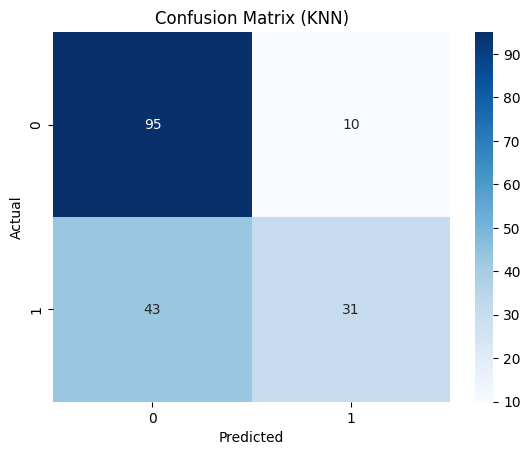

In [42]:
# print confusion matrix with heatmap for knn
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

In [43]:
# show accuracy of knn
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.70
